<a href="https://colab.research.google.com/github/carriecharp/reflections/blob/master/Pay_Equity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housekeeping

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression as lm

my_blue = sb.color_palette('muted')[0]
my_orange = sb.color_palette('muted')[1]

# Helper Functions

In [ ]:
def gen_data(n, base, funcs, betas, labels, err_func):
    '''
    n is the number of obserevations generated. Must be an integer.
    
    Funcs is an ordered list of function calls. Each function call should take in a list of floats
    (corresponding to the variables that have already been given values) and returns a float that corresponds
    to another variable value.
    
    Betas are a list of the linearly combined effects of each variable on compensation. Must be the same length as funcs
    
    Labels is a list of variable names. Must be the same length as funcs
    
    Lastly, err_func is a function which takes in no parameters (to guarentee independence) and returns a float, 
    which is added to each observations
    '''
    if not (len(funcs) == len(betas) == len(labels)):
        raise ValueError("All parameters not of equal length")
    
    data = []
    
    for i in range(n):
        
        row = []
        comp = base + err_func()
        
        for x in range(len(funcs)):
            var = funcs[x](row)
            row.append(var)
            comp += betas[x] * var
            
        row.append(comp)
        
        data.append(row)

    return pd.DataFrame(data, columns=labels+['Compensation'])
        
def plot_gender_pay_differences(df, var="Compensation"):
    '''
    In this function, we assume a column of df named 'Compensation', which should be continuous, and a column
    named 'Gender', which is either 0 or 1, where 1 indicates men while 0 indicates women.
    '''
    
    sb.set_style('whitegrid')
    sb.distplot(df[df['Gender'] == 0][var],label='Men')
    sb.distplot(df[df['Gender'] == 1][var],label='Women')
    
    if var=="Compensation":
        plt.xlabel("Raw Compensation")
    elif var == "log_comp":
        plt.xlabel("Logged Compensation")
    plt.legend()
    plt.show()
    
    print("Mean for women (raw $): {}".format(round(np.mean(df[df['Gender'] == 1]["Compensation"]),2)))
    print("Mean for men (raw $): {}\n".format(round(np.mean(df[df['Gender'] == 0]["Compensation"]),2)))
    
    print("Median for women (raw $): {}".format(round(np.median(df[df['Gender'] == 1]["Compensation"]),2)))
    print("Median for men (raw $): {}".format(round(np.median(df[df['Gender'] == 0]["Compensation"]),2)))
    
def get_coeff(df, outcome="log_comp", x='Gender', controls=['Age','Age squared','Undergrad','Postgrad',
                                                            'Rank 1','Rank 2','Rank 3','Rank 4','Rank 5',
                                                            'Role 1','Role 2','Role 3','Role 4','Role 5',
                                                            'Role 6','Role 7','Role 8','Role 9','Role 10']):
    X = df[controls+[x]]
    y = df[outcome]
    model = lm().fit(X, y)
    return round(model.coef_[-1],2)

In [ ]:
#GENDER

def get_gender(row):
    #Change second list values for unequal gender representation
    return np.random.choice([0,1],p=[0.70,0.3])

#AGE

def get_age(row):
    return max(18, np.random.normal(loc=35,scale=7))

def get_age_sq(row):
    return row[-1]*row[-1]

#EDUCATION

def get_undergrad_educ(row):
    if row[0] == 1:
        #Change second list values to change prevelance of undergrad among women
        return np.random.choice([0,1],p=[0.10,0.90])
    else:
        #Change second list values to change prevelance of undergrad among men
        return np.random.choice([0,1],p=[0.10,0.90])

def get_postgrad_educ(row):
    if row[1] == 0:
        return 0
    if row[0] == 1:
        #Change second list values to change prevelance of postgrad among women
        return np.random.choice([0,1],p=[0.8,0.2])
    else:
        #Change second list values to change prevelance of postgrad among men
        return np.random.choice([0,1],p=[0.8,0.2])
    
def get_highest_educ(row):
    if row[-1] == 1:
        return 3
    elif row[-2] == 1:
        return 2
    else:
        return 1
    
def get_undergrad_by_gender(row):
    return (1 - row[0]) * row[-3]

def get_postgrad_by_gender(row):
    return (1 - row[0]) * row[-3]
    
#RANK

def get_rank(row):
    if row[0] == 0:
        return np.random.choice([1,2,3,4,5],p=[0.4,0.3,0.10,0.1,0.1])
    else:
        return np.random.choice([1,2,3,4,5],p=[0.4,0.3,0.175,0.1,0.025])
    
    
def get_rank_1(row):
    if row[-1] == 1:
        return 1
    else:
        return 0

def get_rank_2(row):
    if row[-2] == 2:
        return 1
    else:
        return 0
    
def get_rank_3(row):
    if row[-3] == 3:
        return 1
    else:
        return 0
    
def get_rank_4(row):
    if row[-4] == 4:
        return 1
    else:
        return 0
    
        
def get_rank_5(row):
    if row[-5] == 5:
        return 1
    else:
        return 0
  
#ROLE

def get_role(row):
    #Roles 1, 3, 5, and 6 will be lower paying positions, roles 2 and 8 will be high paying
    #Role 3 will be slightly woman-typed, role 6 will be heavily woman-typed
    #Role 8 will be heavily man-typed
    if row[0] == 1: #Women
        return np.random.choice([1,2,3,4,5,6,7,8,9,10],p=[0.05,0.2,0.15,0.05,0.05,0.15,0.05,0.05,0.15,0.1])
    else: #Men
        return np.random.choice([1,2,3,4,5,6,7,8,9,10],p=[0.05,0.2,0.05,0.15,0.05,0.05,0.05,0.15,0.15,0.1])

def get_role_1(row):
    if row[-1] == 1:
        return 1
    else:
        return 0

def get_role_2(row):
    if row[-2] == 2:
        return 1
    else:
        return 0
    
def get_role_3(row):
    if row[-3] == 3:
        return 1
    else:
        return 0
    
def get_role_4(row):
    if row[-4] == 4:
        return 1
    else:
        return 0

def get_role_5(row):
    if row[-5] == 5:
        return 1
    else:
        return 0
    
def get_role_6(row):
    if row[-6] == 6:
        return 1
    else:
        return 0
    
def get_role_7(row):
    if row[-7] == 7:
        return 1
    else:
        return 0
    
def get_role_8(row):
    if row[-8] == 8:
        return 1
    else:
        return 0
    
def get_role_9(row):
    if row[-9] == 9:
        return 1
    else:
        return 0
    
def get_role_10(row):
    if row[-10] == 10:
        return 1
    else:
        return 0
    
#PERFORMANCE

def get_perf(row):
    #First value is the average difference of "performance" across genders, while the second
    #is the average difference in performance associated with having an undergrad education,
    #and the third is the difference in performance associated with having a post grad education
    if row[0] == 0:   
        return np.random.choice([1,2,3,4,5,6,7,8],p=[0.025,0.075,0.05,0.25,0.25,0.20,0.1,0.05])
    elif row[1] == 1 & row[-11] == 2:
        return np.random.choice([1,2,3,4,5,6,7,8],p=[0.025,0.075,0.15,0.25,0.34,0.10,0.05,0.01])
    elif row[1] == 1 & row[-11] == 3:
        return np.random.choice([1,2,3,4,5,6,7,8],p=[0.025,0.075,0.15,0.25,0.16,0.20,0.13,0.01])
    elif row[1] == 1 & row[-11] == 4:
        return np.random.choice([1,2,3,4,5,6,7,8],p=[0.025,0.075,0.15,0.25,0.16,0.20,0.13,0.01])
    else:
        return np.random.choice([1,2,3,4,5,6,7,8],p=[0.025,0.075,0.15,0.25,0.25,0.15,0.09,0.01])
#ERROR

def get_error():
    #Change scale to change sd
    #return stats.skewnorm.rvs(25, size=1, loc = 0, scale=15000)[0]
    #return stats.normal.rvs(1.5, size=1, loc = 0, scale=5000)[0]
    return 10000 * np.exp(np.random.normal(scale=0.55))

# Generating Data

In [ ]:
np.random.seed(2020)

funcs = [get_gender, get_age, get_age_sq,
         get_undergrad_educ, get_postgrad_educ, get_highest_educ, get_undergrad_by_gender, get_postgrad_by_gender,
         get_rank, get_rank_1, get_rank_2, get_rank_3, get_rank_4, get_rank_5,
         get_role, get_role_1, get_role_2, get_role_3, get_role_4, get_role_5, 
         get_role_6, get_role_7, get_role_8, get_role_9, get_role_10,
         get_perf]

betas = [0.0, 4281, -42.81,
        17000, 10000, 0, 10000, 8000,
        0, 
        -50000, -40000, 0, 70000, 150000,
        0,
        750, 90000, 0, 25000,  90000, 
        30000, 1000, 130000, 100000, 1500,
        3000]

labels = ['Gender', 'Age', 'Age squared', 
          'Undergrad', 'Postgrad', 'Highest education', 'Undergrad*Man', 'Postgrad*Man',
          'Rank', 'Rank 1', 'Rank 2','Rank 3','Rank 4', 'Rank 5',
          'Role', 'Role 1', 'Role 2', 'Role 3', 'Role 4','Role 5', 
          'Role 6', 'Role 7','Role 8', 'Role 9', 'Role 10',
          'Performance']

extras = pd.DataFrame([[1, 45, 2025,
                        1, 1, 3, 0, 0,
                        5, 0, 0, 0, 0, 1,
                        8,
                        0, 0, 0, 0, 0,
                        0, 0, 1, 0, 0,
                        8, 800000],
                       [1, 40, 40*40,
                        1, 1, 3, 0, 0,
                        5, 0, 0, 0, 0, 1,
                        8,
                        0, 0, 0, 0, 0,
                        0, 0, 1, 0, 0,
                        8, 1200000],
                       [0, 38, 38*38,
                        0, 0, 1, 0, 0,
                        5, 0, 0, 0, 0, 1,
                        8,
                        0, 0, 0, 0, 0,
                        0, 0, 1, 0, 0,
                        8, 1500000],
                       [1, 52, 52*52,
                        1, 1, 3, 0, 0,
                        5, 0, 0, 0, 0, 1,
                        8,
                        0, 0, 0, 0, 0,
                        0, 0, 1, 0, 0,
                        8, 900000],
                       [0, 38, 38*38,
                        1, 1, 3, 1, 1,
                        5, 0, 0, 0, 0, 1,
                        8,
                        0, 0, 0, 0, 0,
                        0, 0, 1, 0, 0,
                        8, 700000],
                       [1, 52, 52*52,
                        1, 0, 2, 0, 0,
                        5, 0, 0, 0, 0, 1,
                        8,
                        0, 0, 0, 0, 0,
                        0, 0, 1, 0, 0,
                        8, 950000],
                       [0, 40, 40*40,
                        1, 1, 3, 1, 1,
                        5, 0, 0, 0, 0, 1,
                        8,
                        0, 0, 0, 0, 0,
                        0, 0, 1, 0, 0,
                        8, 1000000],
                       [1, 39, 39*39,
                        1, 1, 3, 1, 1,
                        5, 0, 0, 0, 0, 1,
                        8,
                        0, 0, 0, 0, 0,
                        0, 0, 1, 0, 0,
                        8, 1200000]],
                     columns=labels+['Compensation'])

df = gen_data(3000, 25000, funcs, betas, labels, get_error).append(extras)
df['log_comp'] = np.log(df['Compensation'])

In [ ]:
df.to_csv('PayEquityData.csv')

# Generating Figures

In [ ]:
b = {1: -.1534924,
     2: -.1516288,
     3: -.1074072,
     4: -.0553922,
     5: -.0258957,
     6: -.0152272}

se = {1: .0142396,
      2: .0140661,
      3: .0104576,
      4: .0040069,
      5: .0118409,
      6: .0109855}

def coefs(model):
    return [b[m+1] for m in range(model)]

def hi(model):
    return b[model] + 2*se[model]

def low(model):
    return b[model] - 2*se[model]

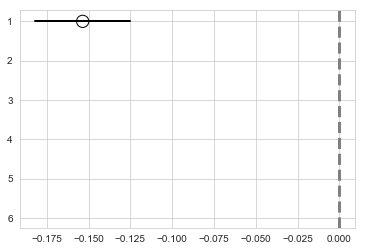

In [ ]:
sb.set_style('whitegrid')

plt.scatter(x=[coefs(1)],
            y=[1],
            s=150, facecolors="none", edgecolors="black")
plt.scatter(x=[coefs(6)],
            y=[1,2,3,4,5,6],
            s=150, facecolors="none", edgecolors="none")
plt.plot([hi(1),low(1)],[1,1], c="black", ls="-", lw=2)
#plt.plot([hi(2),low(2)],[2,2], c="black", ls="-", lw=2)
#plt.plot([hi(3),low(3)],[3,3], c="black", ls="-", lw=2)
#plt.plot([hi(4),low(4)],[4,4], c="black", ls="-", lw=2)
#plt.plot([hi(5),low(5)],[5,5], c="black", ls="-", lw=2)
#plt.plot([hi(6),low(6)],[6,6], c="black", ls="-", lw=2)
plt.axvline(0, ls='--',color='grey', lw='3')
plt.ylim=(1,6)
plt.xlim=(-.265,.01)
plt.gca().invert_yaxis()
plt.show()

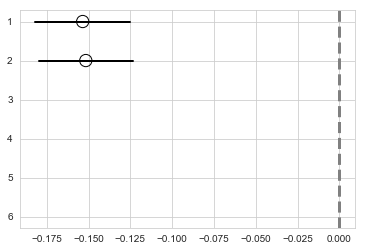

In [ ]:
plt.scatter(x=[coefs(2)],
            y=[1,2],
            s=150, facecolors="none", edgecolors="black")
plt.scatter(x=[coefs(6)],
            y=[1,2,3,4,5,6],
            s=150, facecolors="none", edgecolors="none")
plt.plot([hi(1),low(1)],[1,1], c="black", ls="-", lw=2)
plt.plot([hi(2),low(2)],[2,2], c="black", ls="-", lw=2)
#plt.plot([hi(3),low(3)],[3,3], c="black", ls="-", lw=2)
#plt.plot([hi(4),low(4)],[4,4], c="black", ls="-", lw=2)
#plt.plot([hi(5),low(5)],[5,5], c="black", ls="-", lw=2)
#plt.plot([hi(6),low(6)],[6,6], c="black", ls="-", lw=2)
plt.axvline(0, ls='--',color='grey', lw='3')
plt.ylim=(1,6)
plt.xlim=(-.265,.01)
plt.gca().invert_yaxis()
plt.show()

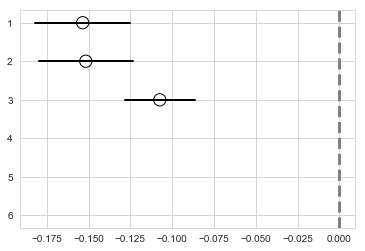

In [ ]:
plt.scatter(x=[coefs(3)],
            y=[1,2,3],
            s=150, facecolors="none", edgecolors="black")
plt.scatter(x=[coefs(6)],
            y=[1,2,3,4,5,6],
            s=150, facecolors="none", edgecolors="none")
plt.plot([hi(1),low(1)],[1,1], c="black", ls="-", lw=2)
plt.plot([hi(2),low(2)],[2,2], c="black", ls="-", lw=2)
plt.plot([hi(3),low(3)],[3,3], c="black", ls="-", lw=2)
#plt.plot([hi(4),low(4)],[4,4], c="black", ls="-", lw=2)
#plt.plot([hi(5),low(5)],[5,5], c="black", ls="-", lw=2)
#plt.plot([hi(6),low(6)],[6,6], c="black", ls="-", lw=2)
plt.axvline(0, ls='--',color='grey', lw='3')
plt.ylim=(1,6)
plt.xlim=(-.265,.01)
plt.gca().invert_yaxis()
plt.show()

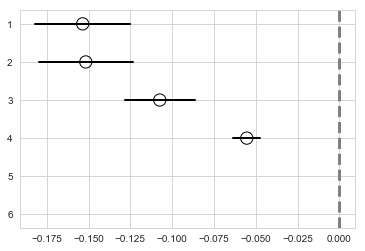

In [ ]:
plt.scatter(x=[coefs(4)],
            y=[1,2,3,4],
            s=150, facecolors="none", edgecolors="black")
plt.scatter(x=[coefs(6)],
            y=[1,2,3,4,5,6],
            s=150, facecolors="none", edgecolors="none")
plt.plot([hi(1),low(1)],[1,1], c="black", ls="-", lw=2)
plt.plot([hi(2),low(2)],[2,2], c="black", ls="-", lw=2)
plt.plot([hi(3),low(3)],[3,3], c="black", ls="-", lw=2)
plt.plot([hi(4),low(4)],[4,4], c="black", ls="-", lw=2)
#plt.plot([hi(5),low(5)],[5,5], c="black", ls="-", lw=2)
#plt.plot([hi(6),low(6)],[6,6], c="black", ls="-", lw=2)
plt.axvline(0, ls='--',color='grey', lw='3')
plt.ylim=(1,6)
plt.xlim=(-.265,.01)
plt.gca().invert_yaxis()
plt.show()

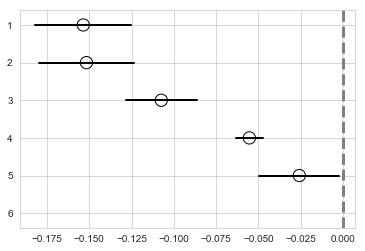

In [ ]:
plt.scatter(x=[coefs(5)],
            y=[1,2,3,4,5],
            s=150, facecolors="none", edgecolors="black")
plt.scatter(x=[coefs(6)],
            y=[1,2,3,4,5,6],
            s=150, facecolors="none", edgecolors="none")
plt.plot([hi(1),low(1)],[1,1], c="black", ls="-", lw=2)
plt.plot([hi(2),low(2)],[2,2], c="black", ls="-", lw=2)
plt.plot([hi(3),low(3)],[3,3], c="black", ls="-", lw=2)
plt.plot([hi(4),low(4)],[4,4], c="black", ls="-", lw=2)
plt.plot([hi(5),low(5)],[5,5], c="black", ls="-", lw=2)
#plt.plot([hi(6),low(6)],[6,6], c="black", ls="-", lw=2)
plt.axvline(0, ls='--',color='grey', lw='3')
plt.ylim=(1,6)
plt.xlim=(-.265,.01)
plt.gca().invert_yaxis()
plt.show()

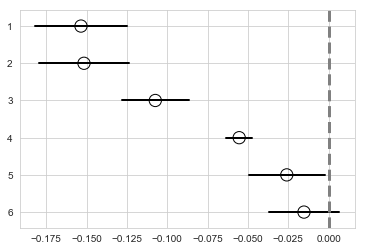

In [ ]:
plt.scatter(x=[coefs(6)],
            y=[1,2,3,4,5,6],
            s=150, facecolors="none", edgecolors="black")
plt.scatter(x=[coefs(6)],
            y=[1,2,3,4,5,6],
            s=150, facecolors="none", edgecolors="none")
plt.plot([hi(1),low(1)],[1,1], c="black", ls="-", lw=2)
plt.plot([hi(2),low(2)],[2,2], c="black", ls="-", lw=2)
plt.plot([hi(3),low(3)],[3,3], c="black", ls="-", lw=2)
plt.plot([hi(4),low(4)],[4,4], c="black", ls="-", lw=2)
plt.plot([hi(5),low(5)],[5,5], c="black", ls="-", lw=2)
plt.plot([hi(6),low(6)],[6,6], c="black", ls="-", lw=2)
plt.axvline(0, ls='--',color='grey', lw='3')
plt.ylim=(1,6)
plt.xlim=(-.265,.01)
plt.gca().invert_yaxis()
plt.show()

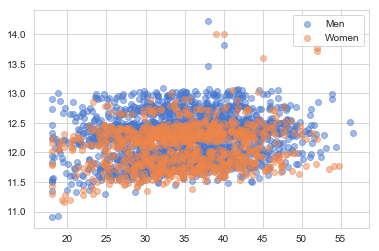

In [ ]:
plt.scatter(x='Age',y="log_comp",color=my_blue,
            data=df[df['Gender']==0],alpha=0.5, label="Men")
plt.scatter(x='Age',y="log_comp",color=my_orange,
            data=df[df['Gender']==1],alpha=0.5, label="Women")
plt.legend()
plt.show()

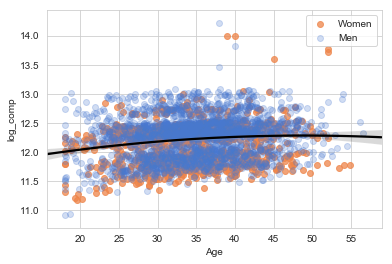

In [ ]:
plt.scatter(x='Age',y="log_comp",color=my_orange,
            data=df[df['Gender']==1],alpha=0.75, label="Women")
plt.scatter(x='Age',y="log_comp",color=my_blue,
            data=df[df['Gender']==0],alpha=0.25, label="Men")
sb.regplot(x='Age',y="log_comp",data=df,order=2,
           scatter=False, color="black")
plt.legend()
plt.show()

In [ ]:
role_names = ['Finance','Health analyst','People experience',
              'Sales','Product','Designer','Technician',
              'Software engineer','Data scientist','Customer service']

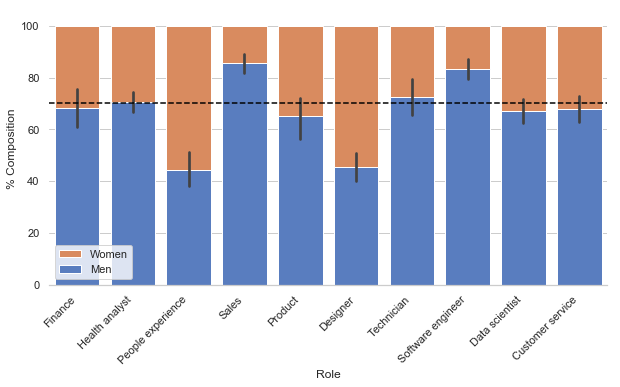

In [ ]:
sb.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 5))
sb.barplot(x='Role', y='Gender', data=df, label="Women", color=my_orange,
           estimator=lambda x: 100)
sb.barplot(x='Role', y='Gender', data=df, label="Men", color=my_blue,
           estimator=lambda x: sum(x==0)*100.0/len(x))
plt.legend(loc="lower left")
plt.ylabel("% Composition")
sb.despine(top=True, left=True)
plt.axhline(70, color='black', ls= '--')
plt.xticks(np.arange(10), role_names, rotation=45, ha='right')
plt.show()

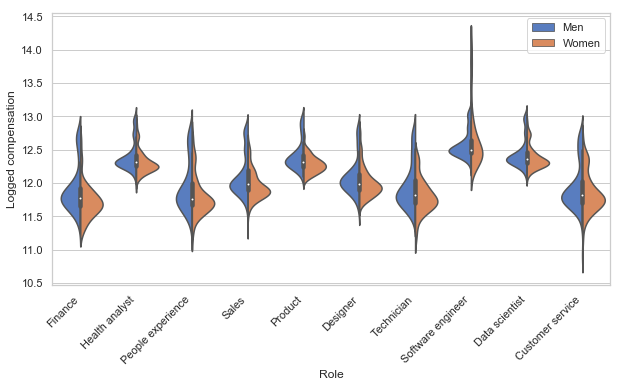

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sb.violinplot(x="Role", y="log_comp", hue="Gender",
                    data=df, palette="muted", split=True)
L = plt.legend()
L.get_texts()[0].set_text('Men')
L.get_texts()[1].set_text('Women')
plt.xticks(np.arange(10), role_names, rotation=45, ha='right')
plt.ylabel("Logged compensation")
plt.show()

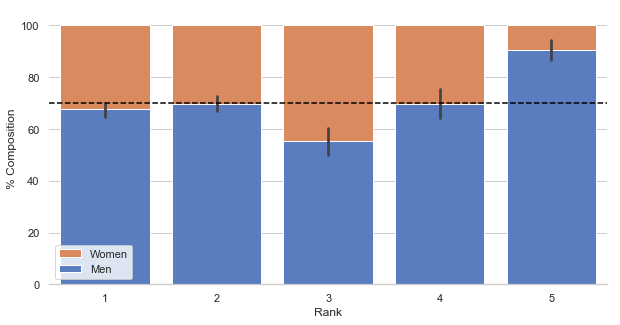

In [ ]:
sb.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 5))
sb.barplot(x='Rank', y='Gender', data=df, label="Women", color=my_orange,
           estimator=lambda x: 100)
sb.barplot(x='Rank', y='Gender', data=df, label="Men", color=my_blue,
           estimator=lambda x: sum(x==0)*100.0/len(x))
plt.legend(loc="lower left")
plt.ylabel("% Composition")
sb.despine(top=True, left=True)
plt.axhline(70, color='black', ls= '--')
plt.show()

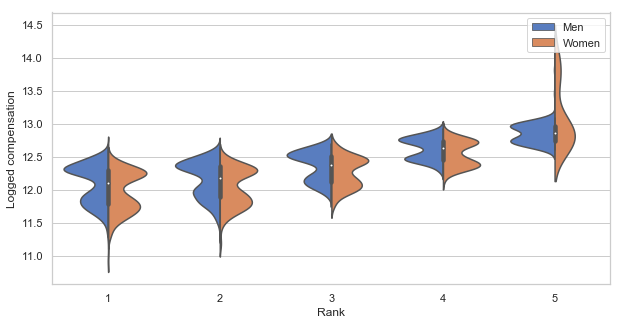

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sb.violinplot(x="Rank", y="log_comp", hue="Gender",
                    data=df, palette="muted", split=True)
L = plt.legend()
L.get_texts()[0].set_text('Men')
L.get_texts()[1].set_text('Women')
plt.ylabel("Logged compensation")
plt.show()

In [ ]:
ed_names = ['High school', 'Undergrad', 'Graduate']

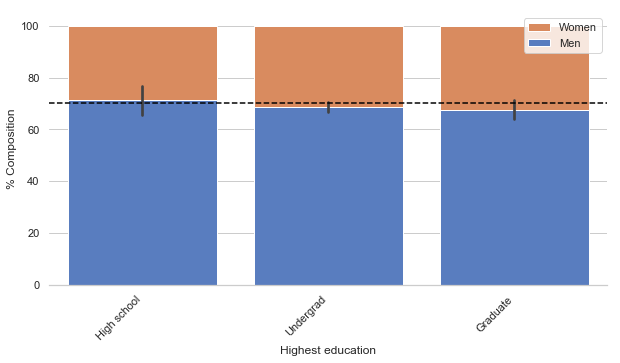

In [ ]:
sb.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 5))
sb.barplot(x='Highest education', y='Gender', data=df, label="Women", color=my_orange,
           estimator=lambda x: 100)
sb.barplot(x='Highest education', y='Gender', data=df, label="Men", color=my_blue,
           estimator=lambda x: sum(x==0)*100.0/len(x))
plt.legend()
plt.ylabel("% Composition")
sb.despine(top=True, left=True)
plt.axhline(70, color='black', ls= '--')
plt.xticks(np.arange(3), ed_names, rotation=45, ha='right')
plt.show()

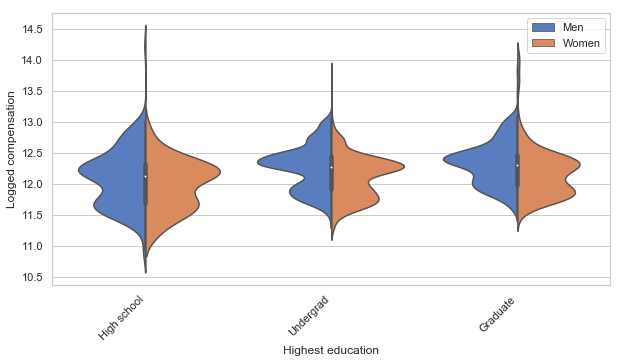

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sb.violinplot(x="Highest education", y="log_comp", hue="Gender",
                    data=df, palette="muted", split=True)
L = plt.legend()
L.get_texts()[0].set_text('Men')
L.get_texts()[1].set_text('Women')
plt.xticks(np.arange(3), ed_names, rotation=45, ha='right')
plt.ylabel("Logged compensation")
plt.show()

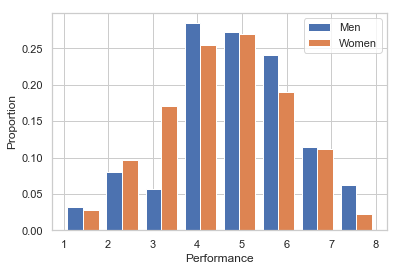

In [ ]:
plt.hist([df[df["Gender"]==0]['Performance'],df[df["Gender"]==1]['Performance']], 
         8, density=True, label=["Men","Women"])
plt.legend()
plt.xlabel("Performance")
plt.ylabel("Proportion")
plt.show()

# Remediation/Intervention Analysis

In [ ]:
@interact_manual(who=['Men','Women'],what=['Increase','Decrease'],how=['By Percent','By Amount'],
          bottom_perc =(0,100), top_perc =(0,100), how_much = '10000')
def intervene(who='Men',what='Decrease',how='By Amount',bottom_perc=0.0,top_perc=100.0,how_much='250'):
    if bottom_perc > top_perc:
        raise ValueError("bottom_perc must be less than top_perc")
        
    try:
        if what == 'Increase':
            change_size = float(how_much)
        else:
            change_size = -float(how_much)
    except ValueError:
        raise ValueError("how_much field should be an integer or float")
    
    if who=="Men":
        gender_target = 0
    else:
        gender_target = 1
    
    bottom_comp = df[df['Gender']==gender_target]['Compensation'].quantile(bottom_perc/100.0)
    top_comp = df[df['Gender']==gender_target]['Compensation'].quantile(top_perc/100.0)
    
    data = []
    total_cost = 0
    affected_count = 0
    
    for i, row in df.iterrows():
        comp = row['Compensation']
        if row['Gender'] == gender_target and comp >= bottom_comp and comp <= top_comp:
            if how=="By Percent":
                row['Compensation'] = comp + (comp*(change_size/100.0))
                total_cost += comp*(change_size/100.0)
                affected_count += 1
            else:
                row['Compensation'] = comp + change_size
                total_cost += change_size
                affected_count += 1
        data.append(list(row))
        
    df_new = pd.DataFrame(data, columns = labels+['Compensation',"log_comp"]).drop("log_comp",axis=1)
    df_new["log_comp"] = np.log(df_new['Compensation'])
    
    ###DELETE 'var' HYPERPARAMETER TO PLOT RAW COMPENSATION###
    plot_gender_pay_differences(df_new, var="log_comp")
    
    print("\nTotal Cost of Intervention (raw $): {}".format(round(total_cost,2)))
    print("Cost Per Affected Individual (raw $): {}".format(round(total_cost/affected_count,2)))
    print("\nGender Bias Coefficient: {}".format(get_coeff(df_new)))

interactive(children=(Dropdown(description='who', options=('Men', 'Women'), value='Men'), Dropdown(description='what', index=1, options=('Increase', 'Decrease'), value='Decrease'), Dropdown(description='how', index=1, options=('By Percent', 'By Amount'), value='By Amount'), IntSlider(value=0, description='bottom_perc'), IntSlider(value=100, description='top_perc'), Text(value='10000', description='how_much'), Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))